In [80]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import category_encoders as ce


%matplotlib inline 

from sklearn.metrics import confusion_matrix,roc_auc_score, roc_curve, f1_score, accuracy_score
from sklearn.metrics import make_scorer, precision_score, precision_recall_curve, precision_recall_curve
from sklearn.metrics import recall_score, roc_curve,auc


import warnings
warnings.filterwarnings('ignore')

In [81]:
heart_disease_prediction = pd.read_csv('./heart.csv')
heart_disease_prediction.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [82]:
display(heart_disease_prediction.shape)
display(heart_disease_prediction.size)

(918, 12)

11016

In [83]:
heart_disease_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [84]:
heart_disease_prediction.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [85]:
heart_disease_prediction.isnull().mean()*100

Age               0.0
Sex               0.0
ChestPainType     0.0
RestingBP         0.0
Cholesterol       0.0
FastingBS         0.0
RestingECG        0.0
MaxHR             0.0
ExerciseAngina    0.0
Oldpeak           0.0
ST_Slope          0.0
HeartDisease      0.0
dtype: float64

In [86]:
Women = heart_disease_prediction.loc[heart_disease_prediction['Sex'] == 'F']["HeartDisease"]
prob_women = (Women.sum()/len(Women)).round(2)*100
print("Probability of HeartDisease in Women:", prob_women,"%")

Men = heart_disease_prediction.loc[heart_disease_prediction['Sex'] == 'M']["HeartDisease"]
prob_men = (Men.sum()/len(Men)).round(2)*100
print("Probability of HeartDisease in Men  :", prob_men,"%")

Probability of HeartDisease in Women: 26.0 %
Probability of HeartDisease in Men  : 63.0 %


In [87]:
numeric_cols = heart_disease_prediction.select_dtypes(include=[np.number])
x=pd.DataFrame(abs(numeric_cols.corr()['HeartDisease']))
x


,HeartDisease
Age,0.282039
RestingBP,0.107589
Cholesterol,0.232741
FastingBS,0.267291
MaxHR,0.400421
Oldpeak,0.403951
HeartDisease,1.000000


Text(0, 0.5, 'Variables')

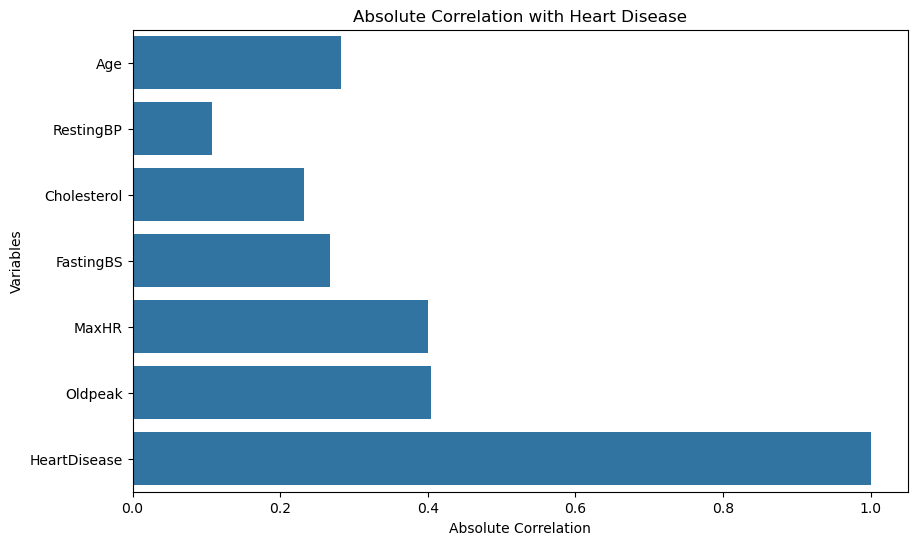

In [88]:
correlation_df = pd.DataFrame(x).reset_index()
correlation_df.columns = ['Variable', 'Correlation']

plt.figure(figsize=(10, 6))
sns.barplot(x='Correlation', y='Variable', data=correlation_df)
plt.title('Absolute Correlation with Heart Disease')
plt.xlabel('Absolute Correlation')
plt.ylabel('Variables')

In [89]:

Cholesterol = heart_disease_prediction[heart_disease_prediction['Cholesterol'] == 0]
Cholesterol.shape

(172, 12)

In [90]:

heart_disease_prediction.loc[heart_disease_prediction['Cholesterol'] == 0,'Cholesterol'] = np.nan
heart_disease_prediction.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289.0,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180.0,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283.0,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214.0,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195.0,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339.0,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237.0,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208.0,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207.0,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284.0,0,Normal,120,N,0.0,Up,0


In [91]:

heart_disease_prediction["Cholesterol"] = heart_disease_prediction["Cholesterol"].fillna(heart_disease_prediction["Cholesterol"].median())

In [92]:

RestingBP = heart_disease_prediction[heart_disease_prediction['RestingBP'] == 0]
RestingBP

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
449,55,M,NAP,0,237.0,0,Normal,155,N,1.5,Flat,1


In [93]:
heart_disease_prediction = heart_disease_prediction.drop(heart_disease_prediction[(heart_disease_prediction['RestingBP'] == 0)].index)    

In [94]:

heart_disease_prediction.sample(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
845,61,F,ASY,145,307.0,0,LVH,146,Y,1.0,Flat,1
363,56,M,ASY,120,237.0,0,ST,148,N,0.0,Flat,1
615,70,M,ASY,130,322.0,0,LVH,109,N,2.4,Flat,1
160,59,M,ASY,140,264.0,1,LVH,119,Y,0.0,Flat,1
490,72,M,NAP,120,214.0,0,Normal,102,Y,1.0,Flat,1


In [95]:
def categorize_bp(bp):
    if bp <= 120:
        return "Normal_BP"
    elif bp <= 129:
        return "Elevated_BP"
    elif bp <= 139:
        return "Hypertension_Stage_1"
    else:
        return "Hypertension_Stage_2"


heart_disease_prediction["RestingBP_Category"] = heart_disease_prediction["RestingBP"].apply(categorize_bp)
print(heart_disease_prediction['RestingBP_Category'].value_counts())

heart_disease_prediction.sample(5)

RestingBP_Category
Hypertension_Stage_2    327
Normal_BP               292
Hypertension_Stage_1    216
Elevated_BP              82
Name: count, dtype: int64


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,RestingBP_Category
314,53,M,ASY,80,237.0,0,Normal,141,Y,2.0,Down,0,Normal_BP
111,57,M,ASY,150,255.0,0,Normal,92,Y,3.0,Flat,1,Hypertension_Stage_2
520,64,M,ASY,130,223.0,0,ST,128,N,0.5,Flat,0,Hypertension_Stage_1
405,35,M,ASY,120,237.0,1,Normal,130,Y,1.2,Flat,1,Normal_BP
304,51,M,ASY,95,237.0,1,Normal,126,N,2.2,Flat,1,Normal_BP


In [96]:

heart_disease_prediction['RestingBP_Category'] = heart_disease_prediction['RestingBP_Category'].astype(object)

In [97]:
def categorize_cholesterol(cholesterol):
    if 0 < cholesterol <= 200:
        return "Normal"
    elif 200 < cholesterol <= 230:
        return "Borderline"
    elif 230 < cholesterol <= 500:
        return "High"
    else:
        return "Undefined"  


heart_disease_prediction["Cholesterol_Category"] = heart_disease_prediction["Cholesterol"].apply(categorize_cholesterol)
print( heart_disease_prediction['Cholesterol_Category'].value_counts())
heart_disease_prediction.head()

Cholesterol_Category
High          576
Borderline    187
Normal        150
Undefined       4
Name: count, dtype: int64


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,RestingBP_Category,Cholesterol_Category
0,40,M,ATA,140,289.0,0,Normal,172,N,0.0,Up,0,Hypertension_Stage_2,High
1,49,F,NAP,160,180.0,0,Normal,156,N,1.0,Flat,1,Hypertension_Stage_2,Normal
2,37,M,ATA,130,283.0,0,ST,98,N,0.0,Up,0,Hypertension_Stage_1,High
3,48,F,ASY,138,214.0,0,Normal,108,Y,1.5,Flat,1,Hypertension_Stage_1,Borderline
4,54,M,NAP,150,195.0,0,Normal,122,N,0.0,Up,0,Hypertension_Stage_2,Normal


In [98]:

heart_disease_prediction['Cholesterol_Category'] = heart_disease_prediction['Cholesterol_Category'].astype(object)

In [99]:
heart_disease_prediction.dtypes

Age                       int64
Sex                      object
ChestPainType            object
RestingBP                 int64
Cholesterol             float64
FastingBS                 int64
RestingECG               object
MaxHR                     int64
ExerciseAngina           object
Oldpeak                 float64
ST_Slope                 object
HeartDisease              int64
RestingBP_Category       object
Cholesterol_Category     object
dtype: object

In [100]:
numerical = heart_disease_prediction.select_dtypes(include=['number']).columns
categorical = heart_disease_prediction.select_dtypes(include=['object']).columns



In [101]:
heart_final = heart_disease_prediction.drop(['RestingBP','Cholesterol',],axis=1)
heart_final.head()

,Age,Sex,ChestPainType,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,RestingBP_Category,Cholesterol_Category
0,40,M,ATA,0,Normal,172,N,0.0,Up,0,Hypertension_Stage_2,High
1,49,F,NAP,0,Normal,156,N,1.0,Flat,1,Hypertension_Stage_2,Normal
2,37,M,ATA,0,ST,98,N,0.0,Up,0,Hypertension_Stage_1,High
3,48,F,ASY,0,Normal,108,Y,1.5,Flat,1,Hypertension_Stage_1,Borderline
4,54,M,NAP,0,Normal,122,N,0.0,Up,0,Hypertension_Stage_2,Normal


In [102]:
encoder = ce.OrdinalEncoder(cols=['ChestPainType','RestingECG','ST_Slope','Cholesterol_Category','RestingBP_Category'])
heart_final = encoder.fit_transform(heart_final)


heart_final.head()

,Age,Sex,ChestPainType,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,RestingBP_Category,Cholesterol_Category
0,40,M,1,0,1,172,N,0.0,1,0,1,1
1,49,F,2,0,1,156,N,1.0,2,1,1,2
2,37,M,1,0,2,98,N,0.0,1,0,2,1
3,48,F,3,0,1,108,Y,1.5,2,1,2,3
4,54,M,2,0,1,122,N,0.0,1,0,1,2


In [103]:
columns_to_encode = ['Sex', 'ExerciseAngina']
heart_final1 = pd.get_dummies(heart_final, columns=columns_to_encode, drop_first=True)
for col in heart_final1:
    if heart_final1[col].dtype == 'bool':
        heart_final1[col] = heart_final1[col].astype(int)
heart_final1.head()


,Age,ChestPainType,FastingBS,RestingECG,MaxHR,Oldpeak,ST_Slope,HeartDisease,RestingBP_Category,Cholesterol_Category,Sex_M,ExerciseAngina_Y
0,40,1,0,1,172,0.0,1,0,1,1,1,0
1,49,2,0,1,156,1.0,2,1,1,2,0,0
2,37,1,0,2,98,0.0,1,0,2,1,1,0
3,48,3,0,1,108,1.5,2,1,2,3,0,1
4,54,2,0,1,122,0.0,1,0,1,2,1,0


In [104]:
X = heart_final1.drop('HeartDisease',axis=1) 
y = heart_final1['HeartDisease']


In [105]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=21)

In [106]:

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)


display(X_train.head())
display(X_test.head())

,Age,ChestPainType,FastingBS,RestingECG,MaxHR,Oldpeak,ST_Slope,RestingBP_Category,Cholesterol_Category,Sex_M,ExerciseAngina_Y
0,0.530612,0.333333,0.0,0.0,0.436620,0.295455,0.0,0.000000,0.333333,1.0,0.0
1,0.530612,0.000000,0.0,0.5,0.563380,0.295455,0.0,0.000000,0.000000,0.0,0.0
2,0.551020,0.666667,0.0,0.0,0.507042,0.431818,0.5,0.333333,0.000000,1.0,1.0
3,0.306122,0.333333,0.0,0.0,0.809859,0.295455,0.0,0.000000,0.000000,0.0,0.0
4,0.448980,0.666667,0.0,0.5,0.563380,0.863636,0.5,0.000000,0.000000,1.0,1.0


,Age,ChestPainType,FastingBS,RestingECG,MaxHR,Oldpeak,ST_Slope,RestingBP_Category,Cholesterol_Category,Sex_M,ExerciseAngina_Y
0,0.591837,1.000000,0.0,0.0,0.267606,0.409091,0.5,0.333333,0.000000,0.0,0.0
1,0.306122,0.666667,0.0,0.0,0.422535,0.409091,0.5,0.666667,0.333333,1.0,1.0
2,0.244898,0.666667,1.0,0.0,0.647887,0.409091,0.5,0.666667,0.000000,1.0,1.0
3,0.306122,0.666667,0.0,1.0,0.422535,0.579545,0.5,0.666667,0.333333,1.0,1.0
4,0.612245,0.000000,1.0,0.0,0.352113,0.522727,0.5,1.000000,0.000000,1.0,1.0


# Logistc Regression

In [107]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)

log_reg_train = round(log_reg.score(X_train, y_train) * 100, 2)
log_reg_accuracy = round(accuracy_score(y_pred_log, y_test) * 100, 2)
log_reg_f1 = round(f1_score(y_pred_log, y_test) * 100, 2)


print("Classification_Report: \n",classification_report(y_test,y_pred_log))

Classification_Report: 
               precision    recall  f1-score   support

           0       0.80      0.79      0.79        76
           1       0.85      0.86      0.86       108

    accuracy                           0.83       184
   macro avg       0.83      0.83      0.83       184
weighted avg       0.83      0.83      0.83       184



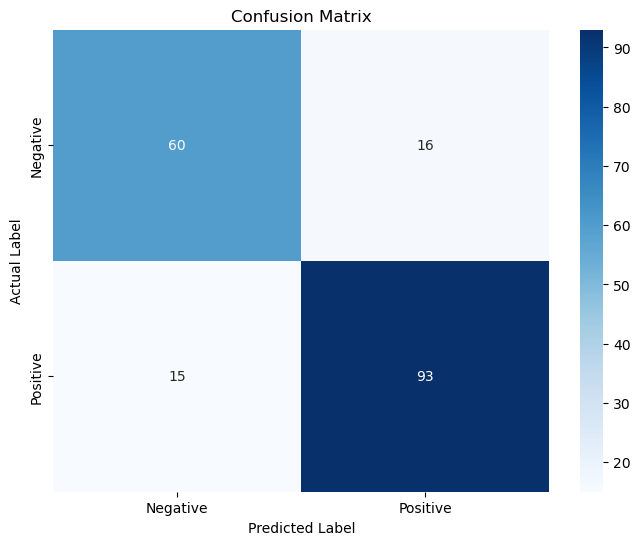

In [108]:
cm = confusion_matrix(y_test, y_pred_log)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

plt.xticks([0.5, 1.5], ['Negative', 'Positive'])
plt.yticks([0.5, 1.5], ['Negative', 'Positive'])
plt.show()

In [109]:
from sklearn.model_selection import cross_val_score
val_score = cross_val_score(estimator=log_reg, X = X_train, y=y_train, cv=10)
print("Model Accuracy Score: {:.2f} %".format(val_score.mean()*100))
print("Std. Dev: {:.2f} %".format(val_score.std()*100))

Model Accuracy Score: 84.85 %
Std. Dev: 2.11 %


# Support vector machine

In [110]:

from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

svm_train = round(svm.score(X_train, y_train) * 100, 2)
svm_accuracy = round(accuracy_score(y_pred_svm, y_test) * 100, 2)
svm_f1 = round(f1_score(y_pred_svm, y_test) * 100, 2)


print(classification_report(y_test,y_pred_svm))

              precision    recall  f1-score   support

           0       0.90      0.80      0.85        76
           1       0.87      0.94      0.90       108

    accuracy                           0.88       184
   macro avg       0.88      0.87      0.87       184
weighted avg       0.88      0.88      0.88       184



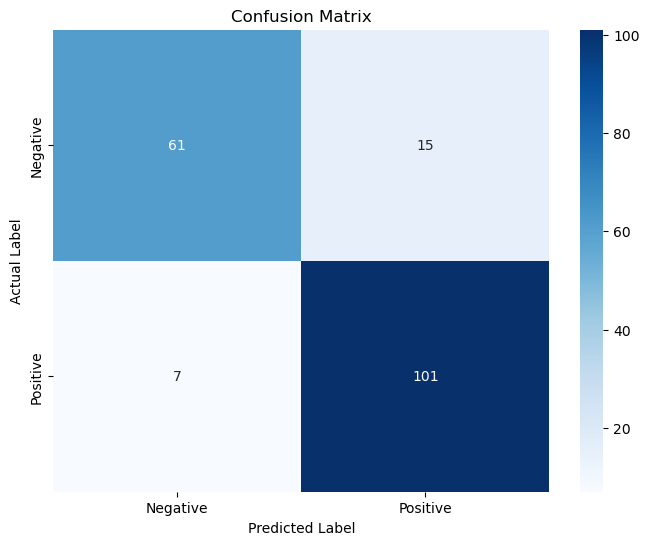

In [111]:
cm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

plt.xticks([0.5, 1.5], ['Negative', 'Positive'])
plt.yticks([0.5, 1.5], ['Negative', 'Positive'])
plt.show()

In [112]:
from sklearn.model_selection import cross_val_score

val_score = cross_val_score(estimator=svm, X = X_train, y=y_train, cv=10)
print("Model Accuracy Score: {:.2f} %".format(val_score.mean()*100))
print("Std. Dev: {:.2f} %".format(val_score.std()*100))

Model Accuracy Score: 84.71 %
Std. Dev: 3.44 %


# Decision Tree

In [113]:

from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred_Decision_tree = decision_tree.predict(X_test)

decision_tree_train = round(decision_tree.score(X_train, y_train) * 100, 2)
decision_tree_accuracy = round(accuracy_score(y_pred_Decision_tree, y_test) * 100, 2)
decision_tree_f1 = round(f1_score(y_pred_Decision_tree, y_test) * 100, 2)


print(classification_report(y_test,y_pred_Decision_tree))

              precision    recall  f1-score   support

           0       0.75      0.74      0.74        76
           1       0.82      0.82      0.82       108

    accuracy                           0.79       184
   macro avg       0.78      0.78      0.78       184
weighted avg       0.79      0.79      0.79       184



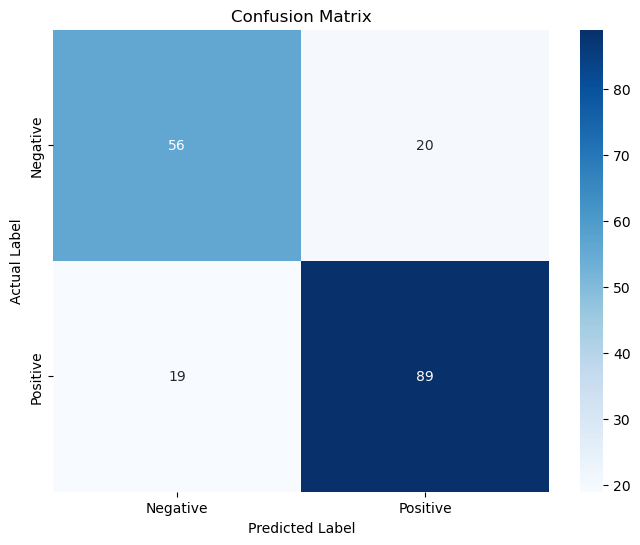

In [114]:
cm = confusion_matrix(y_test, y_pred_Decision_tree)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

plt.xticks([0.5, 1.5], ['Negative', 'Positive'])
plt.yticks([0.5, 1.5], ['Negative', 'Positive'])
plt.show()

In [115]:
from sklearn.model_selection import cross_val_score

val_score = cross_val_score(estimator=decision_tree, X = X_train, y=y_train, cv=10)
print("Model Accuracy Score: {:.2f} %".format(val_score.mean()*100))
print("Std. Dev: {:.2f} %".format(val_score.std()*100))

Model Accuracy Score: 79.79 %
Std. Dev: 5.43 %


# Random Forest

In [116]:
from sklearn.ensemble import RandomForestClassifier

random_forest_clf = RandomForestClassifier(n_estimators=100)
random_forest_clf.fit(X_train, y_train)
y_pred_random_forest_clf = random_forest_clf.predict(X_test)
random_forest_clf.score(X_train, y_train)

random_forest_clf_train = round(random_forest_clf.score(X_train, y_train) * 100, 2)
random_forest_clf_accuracy = round(accuracy_score(y_pred_random_forest_clf, y_test) * 100, 2)
random_forest_clf_f1 = round(f1_score(y_pred_random_forest_clf, y_test) * 100, 2)


print(classification_report(y_test,y_pred_random_forest_clf))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        76
           1       0.85      0.85      0.85       108

    accuracy                           0.83       184
   macro avg       0.82      0.82      0.82       184
weighted avg       0.83      0.83      0.83       184



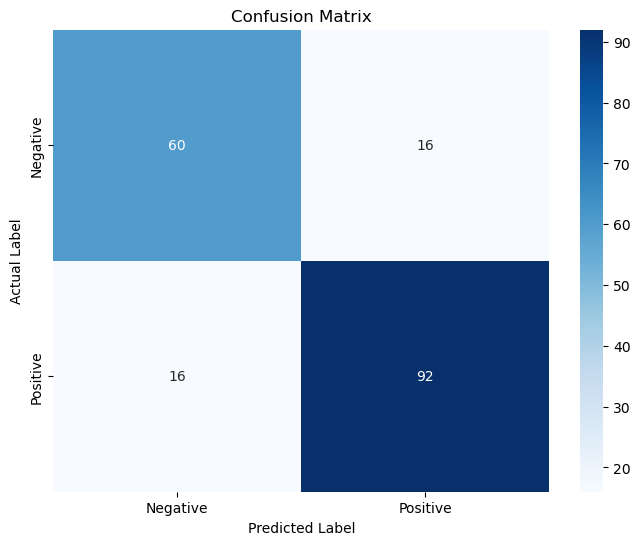

In [117]:
cm = confusion_matrix(y_test, y_pred_random_forest_clf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

plt.xticks([0.5, 1.5], ['Negative', 'Positive'])
plt.yticks([0.5, 1.5], ['Negative', 'Positive'])
plt.show()

In [118]:
from sklearn.model_selection import cross_val_score

val_score = cross_val_score(estimator=random_forest_clf, X = X_train, y=y_train, cv=10)
print("Model Accuracy Score: {:.2f} %".format(val_score.mean()*100))
print("Std. Dev: {:.2f} %".format(val_score.std()*100))

Model Accuracy Score: 85.53 %
Std. Dev: 3.05 %


In [119]:
models = pd.DataFrame({
    'Model': [
        'Logistic Regression','Support Vector Machines',
        'Decision Tree','Random Forest'
    ],
    'Training Accuracy': [
        log_reg_train, svm_train,
        decision_tree_train, random_forest_clf_train
    ],
    'Model f1 Score': [
        log_reg_f1, svm_f1,decision_tree_f1, random_forest_clf_f1
    ],
    'Model Accuracy Score': [
        log_reg_accuracy, svm_accuracy, decision_tree_accuracy, random_forest_clf_accuracy
    ]
    
})

In [120]:
models = models.sort_values(by='Model Accuracy Score', ascending=False)
models

,Model,Training Accuracy,Model f1 Score,Model Accuracy Score
1,Support Vector Machines,87.04,90.18,88.04
0,Logistic Regression,85.13,85.71,83.15
3,Random Forest,100.00,85.19,82.61
2,Decision Tree,100.00,82.03,78.80


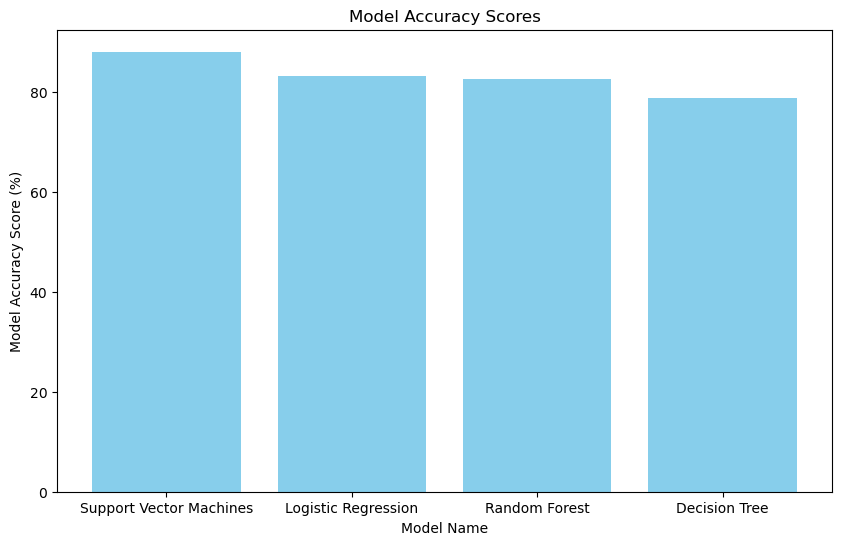

In [122]:
plt.figure(figsize=(10, 6))
plt.rcParams.update({'font.size': 10})
plt.bar(models['Model'], models['Model Accuracy Score'], color='skyblue')
plt.xlabel('Model Name')
plt.ylabel('Model Accuracy Score (%)')
plt.title('Model Accuracy Scores')
plt.show()

In [123]:
Prediction_of_the_model = svm.predict(X_test)
print(Prediction_of_the_model)

[1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 1 1 0 1 1 0 0 0 1 0 0 0 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 0 0 0 0 1 0 1 1 1 0
 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 1 1 0 1 0 1 1 1 0 1 1 0 0 0 1 1 1 1 0 0 0 0
 1 0 1 1 0 0 1 1 1 1 0 0 1 1 0 1 1 1 1 0 1 0 1 0 1 1 0 0 1 1 0 1 0 1 1 0 0
 1 1 1 1 1 1 0 0 1 1 0 1 1 0 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0]


In [124]:
cross_val = pd.DataFrame({'Actual' : y_test , 'Predicted' : Prediction_of_the_model})
sam=cross_val.sample(15)
sam


,Actual,Predicted
852,1,1
553,1,1
396,1,1
658,0,0
224,0,0
77,0,0
313,1,1
441,1,1
779,0,0
606,1,1


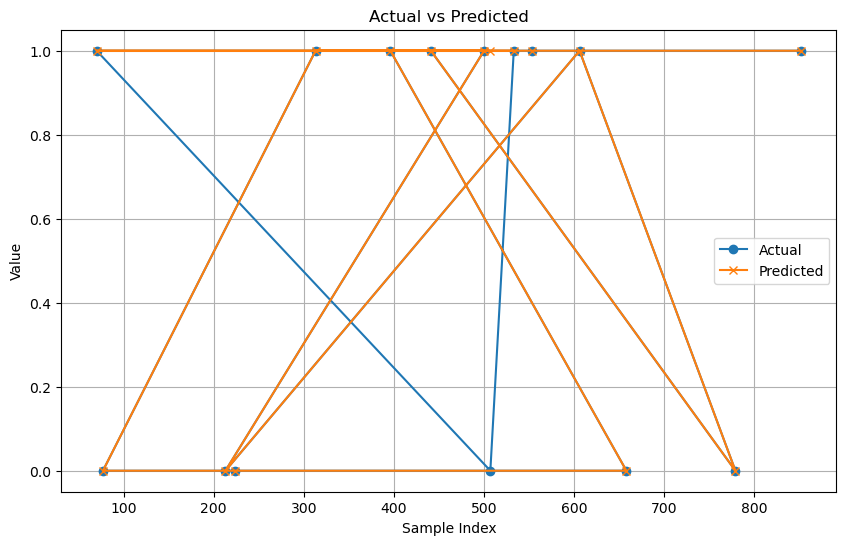

In [125]:

# Plotting the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(sam['Actual'], label='Actual', marker='o')
plt.plot(sam['Predicted'], label='Predicted', marker='x')
plt.title('Actual vs Predicted')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()